In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score 
from nltk.corpus import stopwords
import re

In [ ]:
file = r'/content/drive/My Drive/final_project.csv'
data=pd.read_csv(file, engine='python')
data.columns=["project"]
rawlist=list(data.project)
print(rawlist)

["A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'", "A study to analyze Steel Cast Limited, a forging companys performance in comparison with its peers.\\n Used fundamental analysis of Financial Statements and calculated relevant Financial Ratios to evaluate companys status.\\n Calculated Liquidity, Financing and Performance ratios and compared with the best performer in the sector, Bharat Forge Limited.'", "Achieved a very high PSNR, currently drafting paperforthe results and algorithm.\\n Reconstruction in k-space itself. No superresolution of images. This will make t

In [ ]:
data.project[0]

"A de-duplication task faces two major challenges first one was that the de-dup algorithm has O(n2) complexity. This means time required to get answer will rise exponentially as the number of records increase. This problem was solved using sorted neighborhood approach.\\n Second most important challenge was to achieve tradeoff between precision and recall i.e. improves F1 score. This problem was solved using machine learning techniques after collecting training data.'"

In [ ]:
# cleaning the text
# we need to clean the data in order to get rid of the not relevant words , we need to make a bag of words model which consists of only relevant words
# also apply stemming which is the reducing higher versions of a word to its root level
# the sub method will help us clean the data first parameter means that we will not remove any letter from a-z or A-Z 
import re
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project

'A de duplication task faces two major challenges first one was that the de dup algorithm has O n   complexity  This means time required to get answer will rise exponentially as the number of records increase  This problem was solved using sorted neighborhood approach  n Second most important challenge was to achieve tradeoff between precision and recall i e  improves F  score  This problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# now we convert all uppercase letters to lowercase
project = project.lower()
project

'a de duplication task faces two major challenges first one was that the de dup algorithm has o n   complexity  this means time required to get answer will rise exponentially as the number of records increase  this problem was solved using sorted neighborhood approach  n second most important challenge was to achieve tradeoff between precision and recall i e  improves f  score  this problem was solved using machine learning techniques after collecting training data  '

In [ ]:
# making our own custom stopwords list
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
stopwords = nltk.corpus.stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# cleaning the text
# split function is used to convert the string into a list of words so that we can with help of a for loop go through different words and see if its relevant or not
# the irrelevant word THIS must be removed after this
# tokenised project words excluding the words from nltk as well as our custom stopwords(3)
import re
import nltk
project = re.sub('[^a-zA-Z]', ' ', data.project[0])
project = project.lower()
project = project.split()
project = [word for word in project if not word in set(stopwords)]
project

['de',
 'duplication',
 'task',
 'faces',
 'two',
 'major',
 'challenges',
 'first',
 'one',
 'de',
 'dup',
 'algorithm',
 'n',
 'complexity',
 'means',
 'time',
 'required',
 'get',
 'answer',
 'rise',
 'exponentially',
 'number',
 'records',
 'increase',
 'problem',
 'solved',
 'using',
 'sorted',
 'neighborhood',
 'approach',
 'n',
 'second',
 'important',
 'challenge',
 'achieve',
 'tradeoff',
 'precision',
 'recall',
 'e',
 'improves',
 'f',
 'score',
 'problem',
 'solved',
 'using',
 'machine',
 'learning',
 'techniques',
 'collecting',
 'training',
 'data']

In [ ]:
# joining back the words to form string
#we use inverted commas with space because we want space between the different words
project = ' '.join(project)
project

'de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data'

In [ ]:
# do the above cleaning process for every review using a for loop
# corpus will be alist containig all the cleaned reviews
# stemming not applied
import re
import nltk
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,723):
    project = re.sub('[^a-zA-Z]', ' ', data.project[i])
    project = project.lower()
    project = project.split()
    project = [word for word in project if not word in set(stopwords)]
    project = ' '.join(project)
    corpus.append(project)
    #print(corpus) HERE I HAVE NOT  PRINTED THE CORPUS BECAUSE IT WAS SHOWING AN ERROR: IOPub data rate exceeded


In [ ]:
# CORPUS WITHOUT CUSTOM STOPWORDS
corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MAXIMUM OF 15 WORDS IN THE CORPUS
split_list14 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) <= 10:
    print(temp)
    split_list14.append(temp)

    sentence14 = []
for items in split_list14:
  sentence14.append(' '.join(items))

['achieved', 'accuracy', 'k', 'k', 'parameters', 'used', 'keras', 'n', 'max', 'accuracy']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['name']
['error']
['error']
['blog', 'learning', 'basics', 'analytics']
['digital', 'assistant', 'written', 'python', 'uses', 'speech', 'recognition', 'obey', 'commands']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['fitness', 'app', 'offering', 'diet', 'exercise', 'plans', 'users']
['habit', 'tracking', 'app', 'build', 'using', 'swiftui']
['visualization', 'dashboard', 'different', 'visualizations', 'different', 'parameters']
['altrium', 'quickest', 'service', 'solve', 'homework']
['internal', 'member', 'app', 'dsckiit', 'team']
['iot', 'based', 'biometric', 'project', 'automate', 'process', 'taking', 'attendance']
['analysis', 'baseball', 'player', 'dataset', 'career', 'statistics']
['analytics', 'vidya', 'machine', 'learning', 'contests', 'solutions']
['analyzed', 'titanic', 'dataset', 'kaggle', 'used', 'pr

In [ ]:
sentence14

['achieved accuracy k k parameters used keras n max accuracy',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'error',
 'error',
 'blog learning basics analytics',
 'digital assistant written python uses speech recognition obey commands',
 'fitness app offering diet exercise plans users',
 'fitness app offering diet exercise plans users',
 'habit tracking app build using swiftui',
 'visualization dashboard different visualizations different parameters',
 'altrium quickest service solve homework',
 'internal member app dsckiit team',
 'iot based biometric project automate process taking attendance',
 'analysis baseball player dataset career statistics',
 'analytics vidya machine learning contests solutions',
 'analyzed titanic dataset kaggle used predict survival passengers onboard',
 'analyzing comparing gdps different indian states finding ways improve n',
 'android application real time bus tracking',
 'bridge detection roi sar satellite images',
 'build mod

In [ ]:
len(sentence14)

95

In [ ]:
# PRINTING ONLY THOSE PROJECTS THAT HAVE A MINIMUM OF 15 WORDS IN THE CORPUS
split_list15 = []
for i in corpus: 
  temp = i.split(" ")
  if len(temp) > 10:
    print(temp)
    split_list15.append(temp)

    new_corpus = []
for items in split_list15:
  new_corpus.append(' '.join(items))

['de', 'duplication', 'task', 'faces', 'two', 'major', 'challenges', 'first', 'one', 'de', 'dup', 'algorithm', 'n', 'complexity', 'means', 'time', 'required', 'get', 'answer', 'rise', 'exponentially', 'number', 'records', 'increase', 'problem', 'solved', 'using', 'sorted', 'neighborhood', 'approach', 'n', 'second', 'important', 'challenge', 'achieve', 'tradeoff', 'precision', 'recall', 'e', 'improves', 'f', 'score', 'problem', 'solved', 'using', 'machine', 'learning', 'techniques', 'collecting', 'training', 'data']
['study', 'analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'performance', 'comparison', 'peers', 'n', 'used', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'n', 'calculated', 'liquidity', 'financing', 'performance', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited']
['achieved', 'high', 'psnr', 'currently', 'drafting', 'paperforthe', 'result

In [ ]:
# THIS IS OUR NEW CORPUS
new_corpus

['de duplication task faces two major challenges first one de dup algorithm n complexity means time required get answer rise exponentially number records increase problem solved using sorted neighborhood approach n second important challenge achieve tradeoff precision recall e improves f score problem solved using machine learning techniques collecting training data',
 'study analyze steel cast limited forging companys performance comparison peers n used fundamental analysis financial statements calculated relevant financial ratios evaluate companys status n calculated liquidity financing performance ratios compared best performer sector bharat forge limited',
 'achieved high psnr currently drafting paperforthe results algorithm n reconstruction k space superresolution images make nmri process lot faster n highly sub sampled knee mri data used forthe results packed imaginary nand real parts fourier space real value',
 'achieved accuracy problem solved first time n video classification 

In [ ]:
len(new_corpus)

628

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

newStopWords = ['using','used','user','dataset', 'c', 'f', 'n', 'e','type','rating','performing','complete','sample', 'experience','develop','developed','function','design','applications','display','displayed','provide','provided','check','checked','working','high','low', 'current','computing','go','version','level','player','completed','better','level','online','people','management','type','uses','social','working','worked','important','quality','compiler','incorporating','derived','derive','upon','improoved','restaurant','please','standard','diet','refer','order', 'access',   'ease', 'skill', 'slills', 'delivery', 'require', 'required', 'requirement', 'answering', 'design','created', 'creating', 'practices', 'analyzed', 'common', 'successfully',  'adding',  'create', 'technologies', 'development','method','built', 'study', 'studied', 'given', 'review', 'value', 'done', 'result', 'proposed', 'make', 'knowledge', 'apply', 'applied',  'consists', 'description', 'approaches',   'succesfully', 'capable', 'automatically', 'challenge', 'records', 'products', 'repository', 'perform', 'performed', 'detection', 'detect', 'large', 'made', 'scale',  'display', 'video', 'help', 'helped' ,'helping',  'purpose', 'content', 'gives', 'components', 'object',  'methodology', 'problem',  'person', 'book', 'media', 'general' , 'ignore', 'two',  'customer', 'take', 'information', 'users', 'results', 'involved', 'building', 'send', 'workshop',  'team', 'skills', 'basic', 'environment', 'diagrams', 'concepts', 'succesfully', 'whether', 'variables',  'process',  'aim', 'work',  'build',  'customers',   'number', 'work', 'one', 'file', 'approach', 'day', 'related', 'case', 'new', 'benchmark', 'sense', 'iitb', 'tried', 'commands', 'event', 'provides', 'aim',  'existing', 'details', 'etc', 'search', 'food', 'first', 'input', 'output', 'booking', 'received', 'practises', 'kernel', 'loaded', 'efficient', 'detail',  'goal', 'identify', 'find',  'single', 'real', 'sudden', 'location', 'learned', 'part', 'udacity', 'task','techniques','various',  'use', 'system','provide',  'based', 'project', 'product', 'different', 'student', 'objective', 'task', 'report', 'determine', 'performance', 'model', 'data', 'implement', 'implementation', 'application', 'guide', 'prof', 'predict', 'technology', 'jupyter', 'notebook', 'project'  , 'matplotlib', 'seaborn',  'achieved', 'different', 'technique', 'developed',  'implemented', 'worked',  'code', 'document', 'word', 'based',  'google', 'colab', 'github' ]
stopwords1.extend(newStopWords)
stopwords1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:

new_corpus_customsp = []
for i in range(0,628):
  project = new_corpus[i]
  project = project.split()
  project = [word for word in project if not word in set(stopwords1)]
  project = ' '.join(project)
  new_corpus_customsp.append(project)


In [ ]:
new_corpus_customsp

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs

In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec ,  TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
# Tokenization of each document
import nltk
nltk.download('punkt')
tokenized_project = []
for project in new_corpus_customsp:
    tokenized_project.append(word_tokenize(project.lower()))
tokenized_project

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[['de',
  'duplication',
  'faces',
  'major',
  'challenges',
  'de',
  'dup',
  'algorithm',
  'complexity',
  'means',
  'time',
  'get',
  'answer',
  'rise',
  'exponentially',
  'increase',
  'solved',
  'sorted',
  'neighborhood',
  'second',
  'achieve',
  'tradeoff',
  'precision',
  'recall',
  'improves',
  'score',
  'solved',
  'machine',
  'learning',
  'collecting',
  'training'],
 ['analyze',
  'steel',
  'cast',
  'limited',
  'forging',
  'companys',
  'comparison',
  'peers',
  'fundamental',
  'analysis',
  'financial',
  'statements',
  'calculated',
  'relevant',
  'financial',
  'ratios',
  'evaluate',
  'companys',
  'status',
  'calculated',
  'liquidity',
  'financing',
  'ratios',
  'compared',
  'best',
  'performer',
  'sector',
  'bharat',
  'forge',
  'limited'],
 ['psnr',
  'currently',
  'drafting',
  'paperforthe',
  'algorithm',
  'reconstruction',
  'k',
  'space',
  'superresolution',
  'images',
  'nmri',
  'lot',
  'faster',
  'highly',
  'sub',
 

In [ ]:
# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(project, [i]) for i, project in enumerate(tokenized_project)]
tagged_data

[TaggedDocument(words=['de', 'duplication', 'faces', 'major', 'challenges', 'de', 'dup', 'algorithm', 'complexity', 'means', 'time', 'get', 'answer', 'rise', 'exponentially', 'increase', 'solved', 'sorted', 'neighborhood', 'second', 'achieve', 'tradeoff', 'precision', 'recall', 'improves', 'score', 'solved', 'machine', 'learning', 'collecting', 'training'], tags=[0]),
 TaggedDocument(words=['analyze', 'steel', 'cast', 'limited', 'forging', 'companys', 'comparison', 'peers', 'fundamental', 'analysis', 'financial', 'statements', 'calculated', 'relevant', 'financial', 'ratios', 'evaluate', 'companys', 'status', 'calculated', 'liquidity', 'financing', 'ratios', 'compared', 'best', 'performer', 'sector', 'bharat', 'forge', 'limited'], tags=[1]),
 TaggedDocument(words=['psnr', 'currently', 'drafting', 'paperforthe', 'algorithm', 'reconstruction', 'k', 'space', 'superresolution', 'images', 'nmri', 'lot', 'faster', 'highly', 'sub', 'sampled', 'knee', 'mri', 'forthe', 'packed', 'imaginary', 'na

In [ ]:
## Train doc2vec model
d2v_model = Doc2Vec(tagged_data, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
d2v_model.save("test_doc2vec.model")
## Load saved doc2vec model
d2v_model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
d2v_model.wv.vocab

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


{'de': <gensim.models.keyedvectors.Vocab at 0x7f332805ba90>,
 'duplication': <gensim.models.keyedvectors.Vocab at 0x7f332805bb38>,
 'faces': <gensim.models.keyedvectors.Vocab at 0x7f332805bba8>,
 'major': <gensim.models.keyedvectors.Vocab at 0x7f332805bc18>,
 'challenges': <gensim.models.keyedvectors.Vocab at 0x7f332805bc50>,
 'dup': <gensim.models.keyedvectors.Vocab at 0x7f332805bcc0>,
 'algorithm': <gensim.models.keyedvectors.Vocab at 0x7f332805bcf8>,
 'complexity': <gensim.models.keyedvectors.Vocab at 0x7f332805bd30>,
 'means': <gensim.models.keyedvectors.Vocab at 0x7f332805bda0>,
 'time': <gensim.models.keyedvectors.Vocab at 0x7f332805be10>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7f332805be80>,
 'answer': <gensim.models.keyedvectors.Vocab at 0x7f332805bef0>,
 'rise': <gensim.models.keyedvectors.Vocab at 0x7f332805bf60>,
 'exponentially': <gensim.models.keyedvectors.Vocab at 0x7f332805bf98>,
 'increase': <gensim.models.keyedvectors.Vocab at 0x7f332805bfd0>,
 'solved': <gensi

In [ ]:
doc_vectors = d2v_model.docvecs.doctag_syn0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


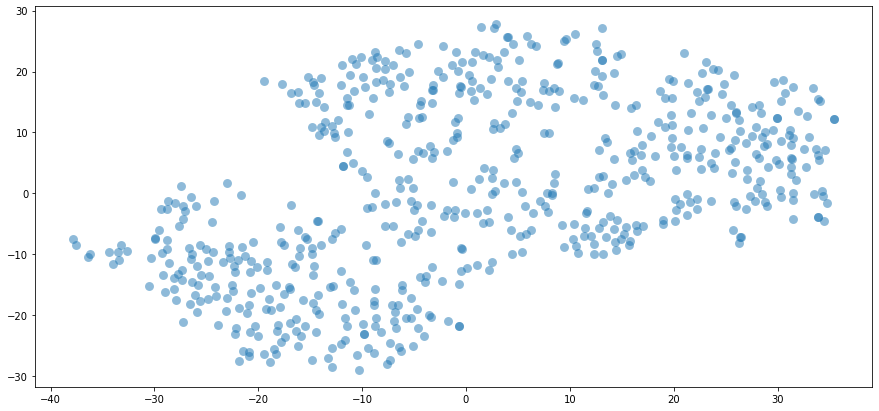

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

distance = pairwise_distances(doc_vectors, metric='cosine')

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 7


projection = TSNE().fit_transform(distance)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
plt.scatter(*projection.T, **plot_kwds)

No handles with labels found to put in legend.


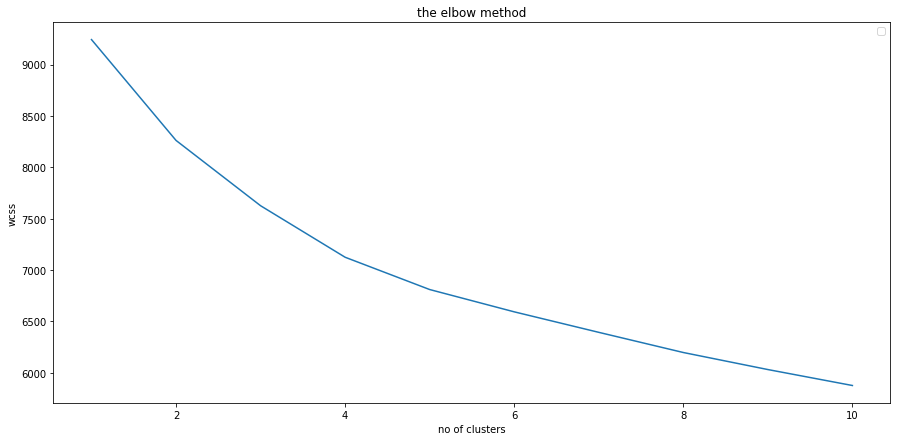

In [ ]:
# Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0 )
    kmeans.fit(doc_vectors)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.legend()
plt.show()

In [ ]:
# Apply kmeans to the dataset
# this gives the nameof cluster to which each person belongs
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(doc_vectors)
print(y_kmeans)

[1 5 1 1 6 1 3 3 5 3 1 1 5 2 5 3 3 0 3 3 3 3 3 3 3 3 3 3 5 6 3 1 3 3 1 3 3
 1 3 3 5 6 6 3 2 0 1 3 1 6 3 3 3 3 3 5 3 5 1 1 1 1 3 3 5 5 2 2 1 3 1 3 1 5
 3 5 0 3 1 1 6 5 1 3 1 3 5 5 3 5 1 1 5 1 5 3 0 3 5 5 1 1 5 5 1 3 1 1 3 5 0
 5 3 3 3 1 2 2 5 3 5 5 1 5 3 5 5 6 3 5 3 1 3 3 3 1 5 3 1 5 5 5 3 6 3 1 5 3
 5 5 6 2 5 0 3 1 3 1 5 3 3 5 3 3 3 3 3 3 2 5 5 3 1 5 2 6 2 5 6 5 3 3 5 3 3
 0 3 1 5 3 5 3 3 5 5 3 1 6 5 5 1 1 1 3 3 1 5 1 4 5 5 1 3 3 1 3 5 1 1 3 2 5
 3 5 5 3 1 3 1 3 3 1 1 3 5 3 5 6 3 5 5 1 3 5 6 5 2 5 5 6 5 2 3 2 6 3 3 3 1
 5 1 5 0 1 5 6 5 3 1 3 2 0 1 1 3 3 3 3 1 3 2 5 1 1 1 3 3 5 1 6 6 1 6 5 6 1
 5 5 0 3 2 2 3 6 3 2 3 6 1 3 1 5 5 1 3 6 5 3 5 2 1 5 3 3 2 2 1 5 0 0 3 5 1
 2 3 6 2 5 5 5 0 1 1 1 3 5 1 1 5 3 3 1 1 1 3 1 3 5 1 1 1 6 1 1 3 1 3 5 3 5
 5 5 1 3 1 1 4 5 3 3 3 3 5 5 6 1 2 3 5 6 6 5 3 1 2 4 1 3 5 0 1 1 1 3 5 5 5
 1 5 3 6 3 0 5 5 3 3 3 2 2 3 3 0 3 1 3 6 3 3 6 3 2 3 0 3 1 5 3 1 2 3 5 5 2
 2 5 5 5 5 0 3 3 3 5 6 1 1 6 3 6 6 5 2 0 5 2 1 1 5 5 1 1 2 3 2 5 3 5 5 1 5
 0 0 3 1 5 5 0 3 2 3 5 3 

In [ ]:
len(y_kmeans)

628

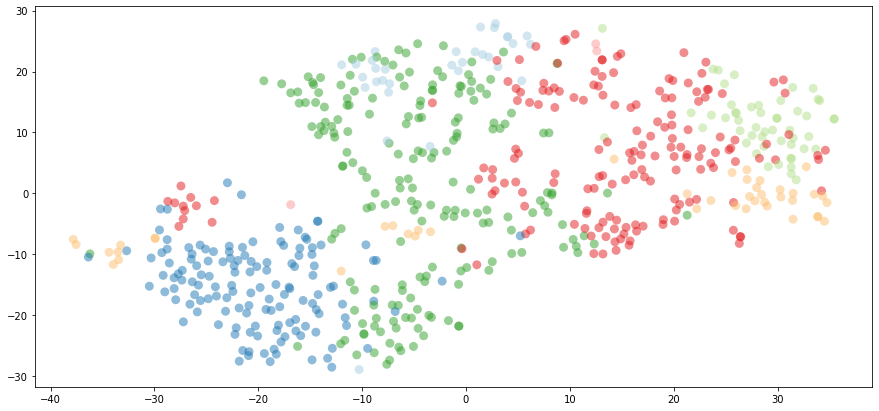

In [ ]:
color_palette = sns.color_palette('Paired', 20)
cluster_colors = [color_palette[doc_vectors] if doc_vectors >= 0
                  else (0.5, 0.5, 0.5)
                  for doc_vectors in y_kmeans]
cluster_member_colors = (cluster_colors)
plt.scatter(*projection.T, s=80, linewidth=0, c=cluster_member_colors, alpha=0.5)

In [ ]:
no_of_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(doc_vectors) 
  
    # The silhouette_score gives the  
    # average value for all the samples. 
    silhouette_avg = silhouette_score(doc_vectors, cluster_labels) 
  
    print("For no of clusters =", n_clusters, 
          " The average silhouette_score is :", silhouette_avg) 

For no of clusters = 2  The average silhouette_score is : 0.17150362
For no of clusters = 3  The average silhouette_score is : 0.11288221
For no of clusters = 4  The average silhouette_score is : 0.09556061
For no of clusters = 5  The average silhouette_score is : 0.0966653
For no of clusters = 6  The average silhouette_score is : 0.06310805
For no of clusters = 7  The average silhouette_score is : 0.093894206
For no of clusters = 8  The average silhouette_score is : 0.08459185
For no of clusters = 9  The average silhouette_score is : 0.06332064
For no of clusters = 10  The average silhouette_score is : 0.042457055


In [ ]:
#first cluster
list1 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 0:
        list1.append(new_corpus_customsp[i])
    # no of projects in cluster 1
len(list1)

32

In [ ]:
#projects in cluster 1
list1

['credit risk validation engagements aimed making banks basel ii compliant engagements broken preparation stage validation stage preparation step included creation list co ordination client get ensure correctness validation stage included validation',
 'analysis naphtha cracking obtained haldia petrochemical dimensionality reduction pca digital analog naphtha cracking processand suggested installation monitoring sensors collection black box optimizing naphtha cracking feed furnace temperatures via fuel usage percent accurate ensemble gradient boosted tree regressor lstm estimating variable cracking',
 'examined features affecting sales big mart stores us like exploratory analysis imputed feature engineered distributions found relevance linear regression predicted wise store wise sales year',
 'stock prices companies underlying financial asset exploratory analysis understand companies clusters companies sectors tsclust prediction forecast underlying financial assets going increase decre

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list1)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT FOR PROJECTS WITH MINIMUM 15 WORDS
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(40)

term    weight
88                  time  0.080745
82                   set  0.070785
4               analysis  0.067348
25              features  0.065188
10        classification  0.060043
15                credit  0.058628
51              modeling  0.057244
50                    ml  0.056400
12                client  0.054262
78                  risk  0.054182
77            regression  0.053844
69                 price  0.051661
28           forecasting  0.051359
27             financial  0.050209
85                 stock  0.050169
79                 sales  0.050064
24               feature  0.048188
65            predicting  0.047695
30                future  0.047446
19              discrete  0.046834
63            parameters  0.045642
87                  text  0.045065
1             accurately  0.045035
13               company  0.044971
61              obtained  0.042457
47                mining  0.042301
17               default  0.041653
20         distributions  0.041478
44             marketing  0.041073
66           preparation  0.040618
42   logistic regression  0.039863
41              logistic  0.039863
39                  like  0.038850
23  exploratory analysis  0.038627
22           exploratory  0.038627
40                linear  0.033685
86                   svm  0.032799
3              algorithm  0.032789
76             reduction  0.032247
70           probability  0.031467

In [ ]:
list10 = ' '.join(list1)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list10)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of credit is : 11
Frequency of risk is : 7
Frequency of validation is : 5
Frequency of engagements is : 2
Frequency of aimed is : 2
Frequency of making is : 3
Frequency of banks is : 1
Frequency of basel is : 1
Frequency of ii is : 1
Frequency of compliant is : 1
Frequency of broken is : 1
Frequency of preparation is : 6
Frequency of stage is : 3
Frequency of step is : 2
Frequency of included is : 3
Frequency of creation is : 1
Frequency of list is : 1
Frequency of co is : 1
Frequency of ordination is : 1
Frequency of client is : 7
Frequency of get is : 2
Frequency of ensure is : 1
Frequency of correctness is : 1
Frequency of analysis is : 12
Frequency of naphtha is : 3
Frequency of cracking is : 4
Frequency of obtained is : 5
Frequency of haldia is : 1
Frequency of petrochemical is : 1
Frequency of dimensionality is : 1
Frequency of reduction is : 3
Frequency of pca is : 1
Frequency of digital is : 2
Frequency of analog is : 1
Frequency of processand is : 1
Frequency of sugg

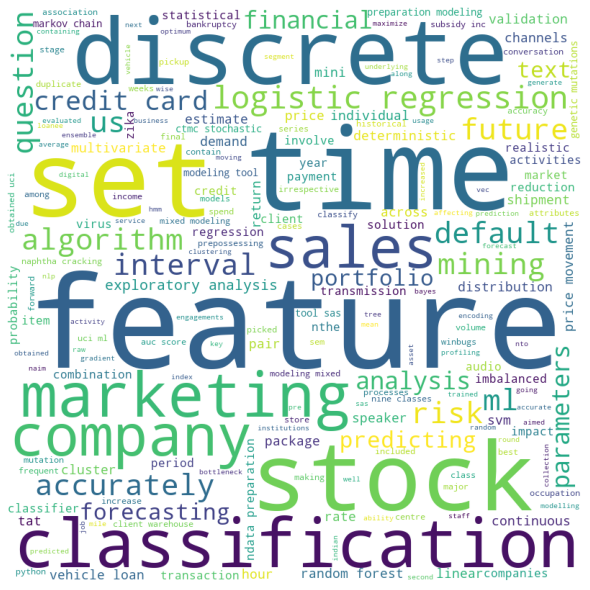

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list10) 
# plot the WordCloud image for cluster 1 min_words = 15                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list2 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 1:
        list2.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list2)

136

In [ ]:
list2

['de duplication faces major challenges de dup algorithm complexity means time get answer rise exponentially increase solved sorted neighborhood second achieve tradeoff precision recall improves score solved machine learning collecting training',
 'psnr currently drafting paperforthe algorithm reconstruction k space superresolution images nmri lot faster highly sub sampled knee mri forthe packed imaginary nand parts fourier space',
 'accuracy solved time classification basis position camera flowneta optical flows frames optical flows ndetermine motion camera subject resnet classification',
 'american sign language primary language north america deaf individuals also hard hearing individuals language employs signs hand along facial gestures bodily pastures images contained hand gestures encoded alphabetic letters trained convolutional neural network classify images asl letters loading examining preprocessing trained network tested',
 'beat baseline score credibility prediction events cr

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list2)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
111           image  0.067406
115          images  0.061242
155         network  0.054285
130        learning  0.052740
242         trained  0.052061
158          neural  0.051147
58             deep  0.041324
40              cnn  0.038657
159  neural network  0.037318
59    deep learning  0.035900
157        networks  0.035803
2          accuracy  0.032781
194     recognition  0.031336
125        language  0.028462
136            lstm  0.027637
13     architecture  0.027561
36   classification  0.027509
233      tensorflow  0.026113
146          models  0.025278
8         algorithm  0.024496
97         generate  0.023951
79             face  0.023902
240            time  0.023517
244        training  0.023348
51    convolutional  0.022354
138         machine  0.022273
87         features  0.021177
224           state  0.020801
34            class  0.020590
239            text  0.020389

In [ ]:
list20 = ' '.join(list2)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list20)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of de is : 3
Frequency of duplication is : 1
Frequency of faces is : 8
Frequency of major is : 3
Frequency of challenges is : 1
Frequency of dup is : 1
Frequency of algorithm is : 16
Frequency of complexity is : 1
Frequency of means is : 3
Frequency of time is : 17
Frequency of get is : 4
Frequency of answer is : 3
Frequency of rise is : 1
Frequency of exponentially is : 1
Frequency of increase is : 5
Frequency of solved is : 3
Frequency of sorted is : 1
Frequency of neighborhood is : 1
Frequency of second is : 2
Frequency of achieve is : 5
Frequency of tradeoff is : 1
Frequency of precision is : 3
Frequency of recall is : 3
Frequency of improves is : 1
Frequency of score is : 9
Frequency of machine is : 13
Frequency of learning is : 54
Frequency of collecting is : 1
Frequency of training is : 16
Frequency of psnr is : 1
Frequency of currently is : 3
Frequency of drafting is : 1
Frequency of paperforthe is : 1
Frequency of reconstruction is : 1
Frequency of k is : 8
Frequency

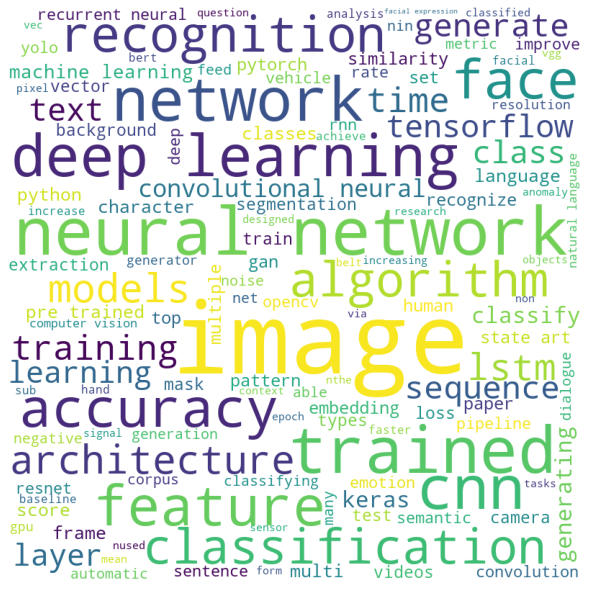

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list20) 
# plot the WordCloud image for cluster 1 min_words = 20                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list3 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 2:
        list3.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list3)

51

In [ ]:
list3

['autonomous humanoid agents playing soccer intelligently simulated nenvironment following physics rule soccer optimized like walking kicking factor x evolutionary strategies cma es ever simspark humanoid gym openai rl nalgorithms trpo ddpg optimize passing dodging defense positioning modules voronoi point map nping hungarian algorithm active attacker selection secured nd position goalie scientific finished th league undergraduate qualify ever competition',
 'leading contributors python library poliastro astrodynamics npython dedicated problems orbit propagation solution lamberts nproblem conversion position velocity vectors classical orbital nelements orbit plotting focusing interplanetary contributions api plotting module addition frame nreference multiple bug fixes gave talk poliastro pycon india poliastro usually tested linux windows added bot automation support issues wrote wrapper around nastroquery querying neos currently contributing ndastcom query module nasa sponsored sbpy',


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list3)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
3     android  0.122480
7         app  0.090378
61     module  0.076722
28   features  0.050387
6         api  0.049332
49       java  0.048874
29      files  0.047643
97       time  0.044607
51   language  0.040197
38        gui  0.039231
66       nthe  0.039163
18    control  0.037953
80     python  0.037098
60     mobile  0.036984
81      radio  0.036609
92   software  0.036142
41      helps  0.034041
96  streaming  0.033774
88     server  0.033484
83      robot  0.032397
65       need  0.031465
19       cost  0.031294
57       maps  0.029867
1    advanced  0.029680
98    website  0.027945
30  following  0.027671
22     degree  0.027200
82     remote  0.026869
44       idea  0.026756
67      nthis  0.026402

In [ ]:
list30 = ' '.join(list3)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list30)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of autonomous is : 2
Frequency of humanoid is : 2
Frequency of agents is : 1
Frequency of playing is : 3
Frequency of soccer is : 2
Frequency of intelligently is : 2
Frequency of simulated is : 1
Frequency of nenvironment is : 1
Frequency of following is : 6
Frequency of physics is : 1
Frequency of rule is : 1
Frequency of optimized is : 2
Frequency of like is : 4
Frequency of walking is : 1
Frequency of kicking is : 1
Frequency of factor is : 1
Frequency of x is : 1
Frequency of evolutionary is : 1
Frequency of strategies is : 1
Frequency of cma is : 1
Frequency of es is : 1
Frequency of ever is : 2
Frequency of simspark is : 1
Frequency of gym is : 1
Frequency of openai is : 1
Frequency of rl is : 1
Frequency of nalgorithms is : 1
Frequency of trpo is : 1
Frequency of ddpg is : 1
Frequency of optimize is : 1
Frequency of passing is : 1
Frequency of dodging is : 1
Frequency of defense is : 1
Frequency of positioning is : 1
Frequency of modules is : 1
Frequency of voronoi is 

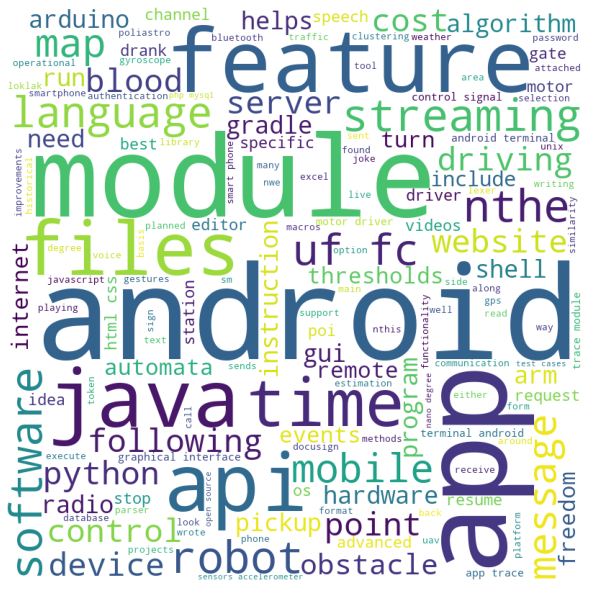

In [ ]:
list30 = ' '.join(list3)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list30) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list4 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 3:
        list4.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list4)

192

In [ ]:
list4

['leading telecom firm predictive models risk churn main indicators churn filtered revenue generate telecom firm tagging churned service usage models risk churned also strong indicators churn',
 'analyzing millions financial fraudulent hand audit analytics platform leveraged collect erps rules features extraction engine rules customizable client predictive models features',
 'author python library einsteinpy library computations nrelativity geodesic equations solving odes visualisations summer gsoc openastronomy numbrella along standalone organisation esa socis set ci cd test automation documentation forthe codebase research university toronto cern nstudying negative matter effect gravitational lensing sponsored python software foundation numfocus esa',
 'clients many erps sap oracle financial maintain financial though erps captured analysis remains client audit analytics platform transform interface conducting exploratory analysis visualization analytics tools anomaly duplication top 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list4)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
240            python  0.043447
6          algorithms  0.039171
151          learning  0.038736
155              like  0.035419
11           analysis  0.033722
181            models  0.033560
166           machine  0.032649
1            accuracy  0.030468
167  machine learning  0.025980
5           algorithm  0.025121
50         classifier  0.024843
48     classification  0.024775
255        regression  0.023986
305              text  0.023908
110          features  0.023793
245            random  0.022531
280               set  0.019789
200            neural  0.019342
234        prediction  0.018958
316           trained  0.018397
146          language  0.017585
198           network  0.017497
154           library  0.017200
54           cleaning  0.016341
52           classify  0.016219
108           feature  0.016213
122           genetic  0.015958
56         clustering  0.015742
116            forest  0.015702
246     random forest  0.015702

In [ ]:
list40 = ' '.join(list4)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list40)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of leading is : 2
Frequency of telecom is : 2
Frequency of firm is : 3
Frequency of predictive is : 5
Frequency of models is : 33
Frequency of risk is : 9
Frequency of churn is : 6
Frequency of main is : 1
Frequency of indicators is : 2
Frequency of filtered is : 1
Frequency of revenue is : 1
Frequency of generate is : 4
Frequency of tagging is : 4
Frequency of churned is : 2
Frequency of service is : 1
Frequency of usage is : 3
Frequency of also is : 18
Frequency of strong is : 2
Frequency of analyzing is : 2
Frequency of millions is : 1
Frequency of financial is : 5
Frequency of fraudulent is : 1
Frequency of hand is : 2
Frequency of audit is : 2
Frequency of analytics is : 6
Frequency of platform is : 3
Frequency of leveraged is : 1
Frequency of collect is : 4
Frequency of erps is : 4
Frequency of rules is : 2
Frequency of features is : 23
Frequency of extraction is : 2
Frequency of engine is : 8
Frequency of customizable is : 1
Frequency of client is : 2
Frequency of auth

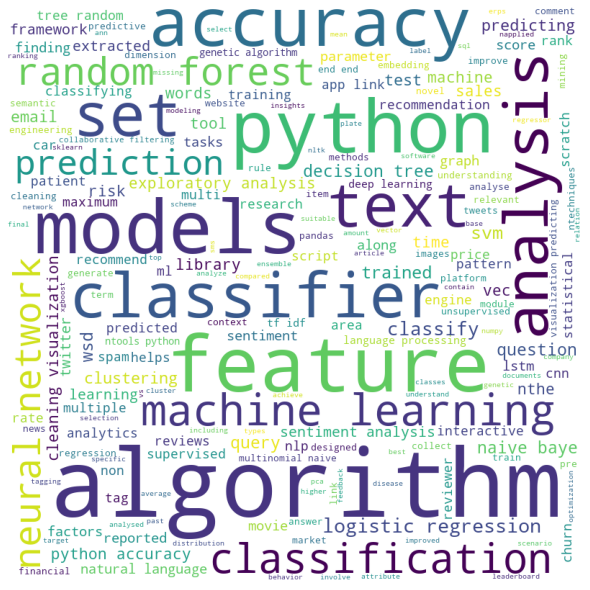

In [ ]:
list40 = ' '.join(list4)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list40) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list5 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 4:
        list5.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list5)

3

In [ ]:
list5

['breast cancer invasive cancer females worldwide accounts female cancers invasive cancers women cancer deaths worldwide including males females breast cancer nmammography energy x rays examine human breast diagnostic screening tool mammography early breast cancer typically characteristic masses micro calcifications nmany times mammogram may produce less satisfactory pleasant unpleasant mammogram influence woman come back next qualitative research methods assess patient satisfaction mammography entitled mammogram intended subjects regarding mammogram test focusing symptoms disease perceived benefits test family history regarding disease testing home efficiently think machine diagnose disease',
 'train neural network prune understand accuracy neural network affected pruned pruning effectively refers increasing sparsity network neural network layer pruning ways weight pruning set individual weights weight matrix zero corresponds deleting connections neurons consecutive layers achieve spa

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=1, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list5)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
408          weight  0.152994
47           cancer  0.111374
322         pruning  0.105792
207             lbw  0.095377
42           breast  0.089099
222       mammogram  0.089099
366        sparsity  0.088160
255         network  0.088160
30           babies  0.079481
248          mother  0.079481
135         factors  0.079481
40            birth  0.079481
41     birth weight  0.079481
234          matrix  0.070528
412   weight matrix  0.070528
43    breast cancer  0.066824
107         disease  0.062911
353             set  0.052896
261          neural  0.052896
262  neural network  0.052896
263          neuron  0.052896
430            zero  0.052896
216           major  0.047689
168    hypertension  0.047689
411      weight lbw  0.047689
156          health  0.047689
56             care  0.047689
269        newborns  0.047689
53          cancers  0.044549
381            test  0.044549

In [ ]:
list50 = ' '.join(list5)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list50)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of breast is : 4
Frequency of cancer is : 5
Frequency of invasive is : 2
Frequency of females is : 2
Frequency of worldwide is : 2
Frequency of accounts is : 1
Frequency of female is : 1
Frequency of cancers is : 2
Frequency of women is : 2
Frequency of deaths is : 1
Frequency of including is : 1
Frequency of males is : 1
Frequency of nmammography is : 1
Frequency of energy is : 1
Frequency of x is : 1
Frequency of rays is : 1
Frequency of examine is : 1
Frequency of human is : 1
Frequency of diagnostic is : 1
Frequency of screening is : 1
Frequency of tool is : 1
Frequency of mammography is : 2
Frequency of early is : 1
Frequency of typically is : 1
Frequency of characteristic is : 1
Frequency of masses is : 1
Frequency of micro is : 1
Frequency of calcifications is : 1
Frequency of nmany is : 1
Frequency of times is : 1
Frequency of mammogram is : 4
Frequency of may is : 1
Frequency of produce is : 1
Frequency of less is : 3
Frequency of satisfactory is : 1
Frequency of ple

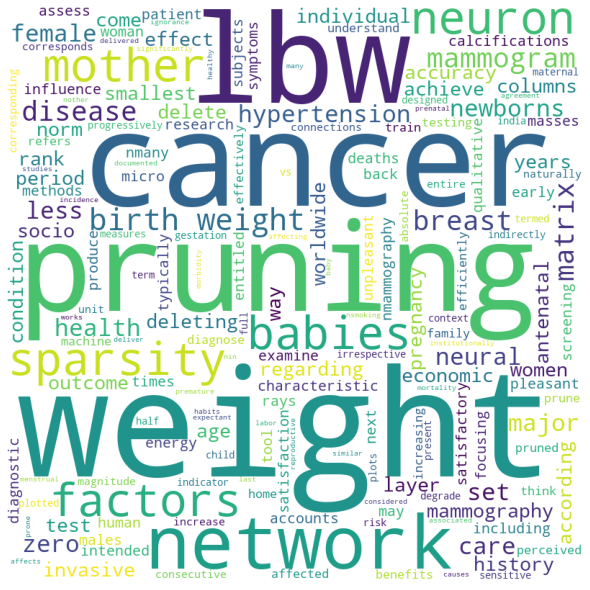

In [ ]:
list50 = ' '.join(list5)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list50) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list6 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 5:
        list6.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list6)

170

In [ ]:
list6

['analyze steel cast limited forging companys comparison peers fundamental analysis financial statements calculated relevant financial ratios evaluate companys status calculated liquidity financing ratios compared best performer sector bharat forge limited',
 'algorithm dynamic maze moving obstacles path source destination',
 'clustering categorise countries socio economic health factors finding countries need focus prepared cleaned adequate along treating outliers silhouette score elbow optimal clusters assign countries cluster ids segregate logical groups patterns',
 'client wanted entities documents due documents size taking lot time manually automate names entities recognition entity disambiguation',
 'designing software air collaborative robot detecting position aeroplane cracks corrosion inspection body aeroplane trained predefined images cracks corrosion lidar air cobot aircraft inspection capturing live image processing opencv labelling images labelme software',
 'resulting map

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list6)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
119             image  0.044417
11          algorithm  0.031108
236              time  0.029925
190        processing  0.028322
20                app  0.024137
185          platform  0.023746
13           analysis  0.022841
127              java  0.021264
257           website  0.020344
14            android  0.016498
218            simple  0.015955
68           designed  0.015911
242            travel  0.015649
105               gui  0.015454
207             robot  0.015208
134          language  0.014923
120  image processing  0.014893
241       transaction  0.014850
64              cycle  0.014451
146           medical  0.014204
40                car  0.013957
220        simulation  0.013924
117               iit  0.013867
50           computer  0.013743
136          learning  0.013597
140              live  0.013400
145            matlab  0.013356
196            python  0.013293
21            arduino  0.013216
35                bot  0.013185

In [ ]:
list60 = ' '.join(list6)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list60)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of analyze is : 2
Frequency of steel is : 1
Frequency of cast is : 1
Frequency of limited is : 3
Frequency of forging is : 1
Frequency of companys is : 3
Frequency of comparison is : 1
Frequency of peers is : 1
Frequency of fundamental is : 1
Frequency of analysis is : 14
Frequency of financial is : 5
Frequency of statements is : 2
Frequency of calculated is : 3
Frequency of relevant is : 3
Frequency of ratios is : 2
Frequency of evaluate is : 1
Frequency of status is : 1
Frequency of liquidity is : 1
Frequency of financing is : 1
Frequency of compared is : 4
Frequency of best is : 4
Frequency of performer is : 1
Frequency of sector is : 1
Frequency of bharat is : 1
Frequency of forge is : 1
Frequency of algorithm is : 25
Frequency of dynamic is : 3
Frequency of maze is : 2
Frequency of moving is : 2
Frequency of obstacles is : 3
Frequency of path is : 8
Frequency of source is : 4
Frequency of destination is : 2
Frequency of clustering is : 6
Frequency of categorise is : 1
Fr

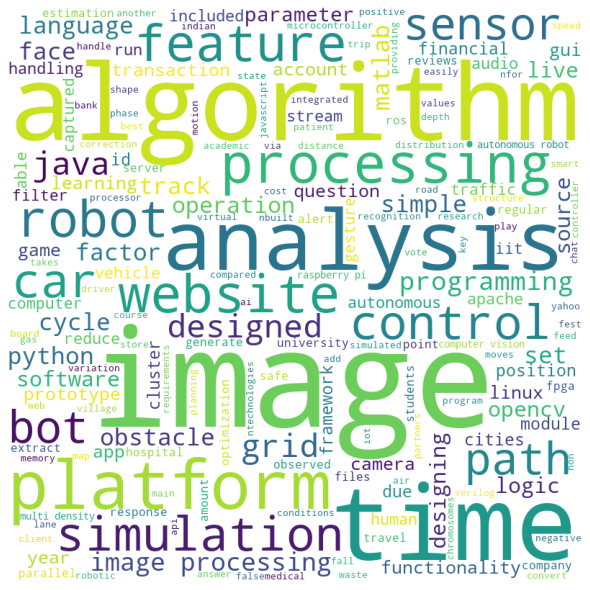

In [ ]:
list60 = ' '.join(list6)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list60) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
# second cluster
list7 = []
for i in range(len(y_kmeans)):
    if y_kmeans[i] == 6:
        list7.append(new_corpus_customsp[i])
    #no of projects in cluster 2 
len(list7)

44

In [ ]:
list7

['side simple interface machine learning personalize scalable responsive suggests simple job seeker need upload resume list relevant jobs inputs achieve scalable web crawler get job descriptions websites job descriptions resume processed text mining extract finally predictive jobs similar resume',
 'shooting game pygame end animations maximize score shooting enemy spaceships asteroids',
 'works network embedding consider network structure generated could potentially nhelpful learning joint network representation aims embed network nodes latent dimensional space keeping mind following properties embeddings also able capture structure network embeddings account generated attributes node node representations follow free property networks',
 'works network embedding consider network structure generated could potentially nhelpful learning joint network representation aims embed network nodes latent dimensional space keeping mind following properties embeddings also able capture structure ne

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english', min_df=3, max_df=0.7, ngram_range=(1,2))
sf = cvec.fit_transform(list7)

# PRINTING THE TOP WORDS BY TFIDF WEIGHT
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})

weights_df.sort_values(by='weight', ascending=False).head(30)

term    weight
26               end  0.091351
86               web  0.088883
30              game  0.073538
87           website  0.066812
37          learning  0.065600
50           network  0.065285
39              like  0.053627
70            server  0.052592
29         framework  0.051740
18          database  0.046332
7                app  0.045527
17               css  0.036703
71           service  0.036463
28            entire  0.036372
22            django  0.035540
42           machine  0.035022
43  machine learning  0.035022
4            android  0.035010
47             mysql  0.034564
53            neural  0.034360
11              base  0.034251
6                api  0.032961
16           crawler  0.032308
73            simple  0.031678
40             logic  0.031317
38           library  0.030620
31         generated  0.030119
78             state  0.029774
74              site  0.029319
8       architecture  0.028999

In [ ]:
list70 = ' '.join(list7)


# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    freq(list70)                     
  
if __name__=="__main__": 
    main()             # call main function 

Frequency of side is : 3
Frequency of simple is : 5
Frequency of interface is : 3
Frequency of machine is : 7
Frequency of learning is : 18
Frequency of personalize is : 1
Frequency of scalable is : 2
Frequency of responsive is : 3
Frequency of suggests is : 2
Frequency of job is : 3
Frequency of seeker is : 1
Frequency of need is : 3
Frequency of upload is : 2
Frequency of resume is : 3
Frequency of list is : 2
Frequency of relevant is : 2
Frequency of jobs is : 2
Frequency of inputs is : 1
Frequency of achieve is : 2
Frequency of web is : 13
Frequency of crawler is : 4
Frequency of get is : 4
Frequency of descriptions is : 2
Frequency of websites is : 3
Frequency of processed is : 1
Frequency of text is : 1
Frequency of mining is : 1
Frequency of extract is : 1
Frequency of finally is : 1
Frequency of predictive is : 2
Frequency of similar is : 1
Frequency of shooting is : 2
Frequency of game is : 7
Frequency of pygame is : 1
Frequency of end is : 19
Frequency of animations is : 1
Fr

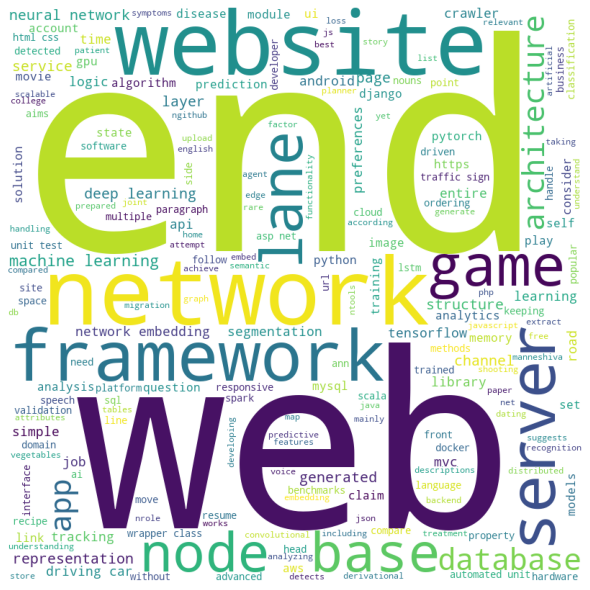

In [ ]:
list70 = ' '.join(list7)

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(list70) 
# plot the WordCloud image for corpus with custom stopwords applied                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 